In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from std_msgs.msg import String

In [2]:
import sys
#sys.path.remove('/opt/ros/melodic/lib/python2.7/dist-packages')## SI NO TIENEN ROS COMENTEN ESTA LINEA
import cv2
from cv_bridge import CvBridge, CvBridgeError
bridge = CvBridge()

In [3]:
from deepface import DeepFace

2024-06-03 13:14:19.457371: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-03 13:14:19.517063: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-03 13:14:19.951819: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-03 13:14:19.954446: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-03 13:14:21.291199: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT

In [4]:
import rospy
import face_recognition
from sensor_msgs.msg import Image , LaserScan , PointCloud2
#rospy.init_node("face_recognition")

In [5]:
from smach_utils_justina import *

JuskeshinoHRI.->Setting ros node...
JuskeshinoHardware.->Setting ros node...


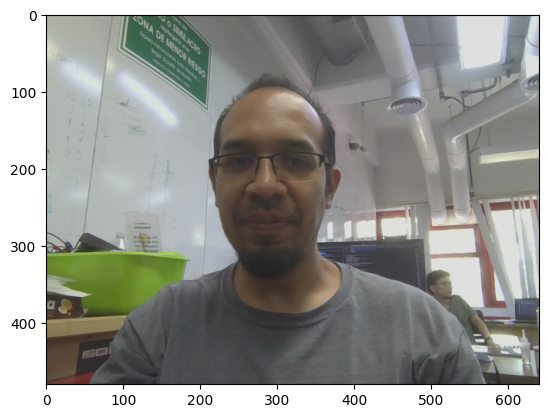

In [6]:
rospy.sleep(5)
data = rospy.wait_for_message("/usb_cam/image_raw",Image,timeout=5) ### FOR DEBUGGING: WHEN USING ROBOT PLEASE CHANGE THIS TOPIC ACCORDINGLY
cv2_img = bridge.imgmsg_to_cv2(data)#, "bgr8")
plt.imshow(cv2_img)
image=np.copy(cv2_img)

In [7]:
frame=image
inHeight = frame.shape[0]
inWidth = frame.shape[1]


# Prepare the frame to be fed to the network
inpBlob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (inWidth, inHeight), (0, 0, 0), swapRB=False, crop=False)

# Set the prepared object as the input blob of the network
net.setInput(inpBlob)

output = net.forward()

NameError: name 'net' is not defined

In [8]:
def point_2D_3D(points_data, px_y, px_x):
    ##px pixels /2D world  P1 3D world
    ## rgbd pOINTCLOUD2 numpify
    P = np.asarray((points_data[px_y, px_x]['x'], points_data[px_y, px_x]['y'], points_data[px_y, px_x]['z']))
    return P


In [11]:
def probmap_to_3d_mean(points_data,):
    xyz=[]
    if len (npmask)>0.1:
        for a in npmask:
            ix,iy=a[0],a[1]
            aux=(np.asarray((points_data['x'][boundRect[1]+ix,boundRect[0]+iy],points_data['y'][boundRect[1]+ix,boundRect[0]+iy],points_data['z'][boundRect[1]+ix,boundRect[0]+iy])))
            #print (aux)
            if np.isnan(aux[0]) or np.isnan(aux[1]) or np.isnan(aux[2]):
                    'reject point'
            else:
                xyz.append(aux)

    xyz=np.asarray(xyz)
    #print (xyz)
    cent=xyz.mean(axis=0)

In [13]:
DeepFace.extract_faces(image)

[{'face': array([[[0.6901961 , 0.6862745 , 0.67058825],
          [0.6901961 , 0.6862745 , 0.67058825],
          [0.69411767, 0.69411767, 0.6745098 ],
          ...,
          [0.57254905, 0.5764706 , 0.6039216 ],
          [0.57254905, 0.5764706 , 0.6039216 ],
          [0.57254905, 0.5764706 , 0.6039216 ]],
  
         [[0.6862745 , 0.68235296, 0.6666667 ],
          [0.68235296, 0.6784314 , 0.6627451 ],
          [0.6862745 , 0.68235296, 0.6627451 ],
          ...,
          [0.57254905, 0.5764706 , 0.60784316],
          [0.57254905, 0.5764706 , 0.60784316],
          [0.57254905, 0.57254905, 0.6039216 ]],
  
         [[0.6901961 , 0.68235296, 0.6666667 ],
          [0.6901961 , 0.68235296, 0.6666667 ],
          [0.6862745 , 0.68235296, 0.6627451 ],
          ...,
          [0.57254905, 0.5764706 , 0.6117647 ],
          [0.5764706 , 0.5764706 , 0.6117647 ],
          [0.57254905, 0.57254905, 0.60784316]],
  
         ...,
  
         [[0.8039216 , 0.8117647 , 0.7764706 ],
      

In [14]:
from face_recog.msg import *

In [15]:
from face_recog.srv import *

In [16]:
def train_face(image, name):
    req=RecognizeFaceRequest()
    strings=Strings()
    string_msg= String()
    string_msg.data=name
    req.Ids.ids.append(string_msg)

    img_msg=bridge.cv2_to_imgmsg(image)
    req.in_.image_msgs.append(img_msg)
    res=train_new_face(req)
    return res.Ids.ids[0].data.split(' ')[0] == 'trained'

In [17]:
### LAUNCH SERVICE OR WAIT FOREVER (VALOR MORGULIS)

rospy.wait_for_service('recognize_face')

In [18]:
### LAUNCH SERVICE OR WAIT FOREVER (VALOR MORGULIS)
rospy.wait_for_service('new_face')
rospy.wait_for_service('analyze_face')

In [19]:
train_new_face = rospy.ServiceProxy('new_face', RecognizeFace)    
recognize = rospy.ServiceProxy('recognize_face', RecognizeFace)    

In [20]:
req=RecognizeFaceRequest()

strings=Strings()
string_msg= String()
string_msg.data='any'
req.Ids.ids.append(string_msg)

img_msg=bridge.cv2_to_imgmsg(cv2_img)
req.in_.image_msgs.append(img_msg)
res=recognize(req)
#res = analyze(req)
res

Ds: 
  data: [0.5120000243186951]
Angs: 
  data: [150.0, 356.0, 305.0, 201.0]
Ids: 
  ids: 
    - 
      data: "jules"

In [21]:
points=rgbd.get_points()

In [22]:
def bbox_3d_mean(points,bbox):
    
    xyz=[]
    bbox[0]
    for i in np.arange((int)(bbox[0]),(int)(bbox[0])+(int)(bbox[2])):
        for j in np.arange((int)(bbox[1]),(int)(bbox[1])+(int)(bbox[3])):
            aa=np.asarray(points[['x','y','z']][i,j])
            if np.isnan(np.asarray((aa['x'],aa['y'],aa['z']))).sum() ==0:                   
                xyz.append(np.asarray((aa['x'],aa['y'],aa['z'])) )
    return np.asarray(xyz).mean(axis=0)

In [23]:
def bbox_3d_mean(points,bbox):
    
    xyz=[]

    for i in np.arange((int)(21.0),(int)(21.0)+(int)(187.0)):
        for j in np.arange((int)(178.0),(int)(178.0)+(int)(344.0)):
            aa=np.asarray(points[['x','y','z']][i,j])
            if np.isnan(np.asarray((aa['x'],aa['y'],aa['z']))).sum() ==0:                   
                xyz.append(np.asarray((aa['x'],aa['y'],aa['z'])) )

In [ ]:
#>>>>>>>
path_for_faces = ""
/home/devan/GIT/Juskeshino/catkin_ws/src/config_files/faces_for_recognition/jules

In [28]:
try:
    res=DeepFace.extract_faces(image )
    print ('face found')
    dfs = DeepFace.find(image,path_for_faces)
    print('id',dfs[0]['identity'].iloc[0].split('/')[-2])
except(ValueError): 
    print('No Face')

face found


NameError: name 'path_for_faces' is not defined